In [23]:
import pandas as pd
import matplotlib.pyplot as plt

import re
import nltk
from collections import Counter
from typing import List
from pymorphy3 import MorphAnalyzer
from nltk.corpus import stopwords

In [3]:
patterns = "[A-Za-z0-9!#$%&'()*+,./:;<=>?@[\]^_`{|}~—\"\-]+"
stopwords_ru = stopwords.words("russian")
morph = MorphAnalyzer()

In [4]:
df_csv = pd.read_csv(r"C:\Users\natal\lab_2_python\annotation1.csv")
texts = []
for absolute_path, rating in zip(df_csv['absolute_path'], df_csv['rating']):
    with open(absolute_path, 'r', encoding='utf-8') as file:
        text = file.read()
        texts.append((text, rating))
        
df = pd.DataFrame(texts, columns=['review', 'rating'])

In [5]:
print(df)

                                                 review  rating
0     Архимаг ищет невесту\nМного читала академок, р...       1
1     Манюня\nВсё, что нужно знать об уровне юмора э...       1
2     Удивительный Александр и крылатые кошки\nПочем...       1
3     Бездушный принц\nЗахотелось прочитать какую-ни...       1
4     Душа осьминога. Тайны сознания удивительного с...       1
...                                                 ...     ...
5000  Спаси меня от холода ночи\nЖизнь деревни Каслд...       5
5001  Витаминка\nКаково это быть купидоном? Это волш...       5
5002  Цветок в мужской академии магии\nХотела бы рас...       5
5003  Господин Неудача\nПосле загадочной гибели роди...       5
5004  Кай\n"Прежде чем войти куда-то, убедись, что т...       5

[5005 rows x 2 columns]


In [6]:
print(df.isnull().sum())
df.dropna()

review    0
rating    0
dtype: int64


,review,rating
0,"Архимаг ищет невесту\nМного читала академок, р...",1
1,"Манюня\nВсё, что нужно знать об уровне юмора э...",1
2,Удивительный Александр и крылатые кошки\nПочем...,1
3,Бездушный принц\nЗахотелось прочитать какую-ни...,1
4,Душа осьминога. Тайны сознания удивительного с...,1
...,...,...
5000,Спаси меня от холода ночи\nЖизнь деревни Каслд...,5
5001,Витаминка\nКаково это быть купидоном? Это волш...,5
5002,Цветок в мужской академии магии\nХотела бы рас...,5
5003,Господин Неудача\nПосле загадочной гибели роди...,5


In [7]:
df['count_word'] = df['review'].apply(lambda word: len(word.split()))
print(df.head())

                                              review  rating  count_word
0  Архимаг ищет невесту\nМного читала академок, р...       1         129
1  Манюня\nВсё, что нужно знать об уровне юмора э...       1          22
2  Удивительный Александр и крылатые кошки\nПочем...       1          25
3  Бездушный принц\nЗахотелось прочитать какую-ни...       1         296
4  Душа осьминога. Тайны сознания удивительного с...       1         131


In [13]:
print(df.describe())

            rating   count_word
count  5005.000000  5005.000000
mean      3.000000   236.367033
std       1.414355   225.855862
min       1.000000     2.000000
25%       2.000000   100.000000
50%       3.000000   182.000000
75%       4.000000   298.000000
max       5.000000  4221.000000


In [14]:
def filter_by_words(df: pd.core.frame.DataFrame, count_words: int) -> pd.core.frame.DataFrame:
    """
        The function filters by reviews depending on the number of words
    Args:
        df (pd.core.frame.DataFrame): date frame with review and number of words
        count_words (int): the number of words to filter

    Returns:
        pd.core.frame.DataFrame: filtered date frame with the required number of words
    """
    return df[df.count_word >= count_words]

print(filter_by_words(df, 1600))

                                                 review  rating  count_word
200   Осенняя сказка\nОсенняя сказка (роман; Алексан...       1        1872
837   Настёна для Зверя\nСегодня я публикую совершен...       1        1622
1002  Секрет небес. Яблоко раздора\nЗнакомиться с кн...       2        2123
1457  Смерть на винограднике\nЭтот детектив с переиз...       2        1663
1615  Империя тишины\nКто-то скажет, что Адриан Марл...       2        1822
1703  Книжные хроники Анимант Крамб\nВсем привет, др...       2        2257
1880  Руки, полные пепла\nМда, ну что сказать... Всё...       2        1645
2026  Дом с синей комнатой\nСправедливости ради, дру...       3        2671
2646  Скоро конец света\nСкоро конец света (роман; М...       3        1699
3076  Под Куполом\nВсем привет, друзья! С вами ††Ищу...       4        2000
3487  Манарага\nВсем привет, друзья! С вами ††Ищущий...       4        2029
3877  К северу от 38 параллели. Как живут в КНДР\nКн...       4        2152
4502  Джейн 

In [17]:
def filter_by_rating(df: pd.core.frame.DataFrame, count_rating: int) -> pd.core.frame.DataFrame:
    """ The function filters by reviews depending on the rating

    Args:
        df (pd.core.frame.DataFrame): date frame with review and rating
        count_rating (int): rating reviews for filtering

    Returns:
        pd.core.frame.DataFrame: filtered date frame with the required rating
    """
    return df[df.rating == count_rating]

print(filter_by_rating(df, 1))

                                                 review  rating  count_word
0     Архимаг ищет невесту\nМного читала академок, р...       1         129
1     Манюня\nВсё, что нужно знать об уровне юмора э...       1          22
2     Удивительный Александр и крылатые кошки\nПочем...       1          25
3     Бездушный принц\nЗахотелось прочитать какую-ни...       1         296
4     Душа осьминога. Тайны сознания удивительного с...       1         131
...                                                 ...     ...         ...
996   Клуб убийств по четвергам\nПервая книга в одно...       1         599
997   Путин и Ротшильды. Игра на миллиарды\nНесусвет...       1          39
998   К востоку от Эдема\nВ правде больше красоты да...       1         815
999   Тринадцатая сказка\nЭто одно из тех немногих п...       1          86
1000  Прикосновение тьмы\nИнтересно, и чего же я ожи...       1         331

[1001 rows x 3 columns]


In [32]:
a = df.groupby('rating').agg({'count_word': ['min', 'max', 'mean']})
print(a)

       count_word                  
              min   max        mean
rating                             
1               2  1872  214.963037
2               5  2257  243.129870
3               5  2671  238.642358
4               6  2152  243.042957
5               6  4221  242.056943


In [30]:
def lemmatize(review: str) -> List[str]:
    """ excludes stop words, commas and brings words to a normal appearance

    Args:
        review (str): book review

    Returns:
        List[str]: a list with words
    """
    review = re.sub(patterns, ' ', review)
    tokens = nltk.word_tokenize(review.lower())
    preprocessed_text = []
    for token in tokens:
        lemma = morph.parse(token)[0].normal_form
        if lemma not in stopwords_ru:
            preprocessed_text.append(lemma)
    return preprocessed_text


def most_popular_words(df: pd.core.frame.DataFrame, rating: int) -> List[tuple[str, int]]:
    """ the first 10 most common words according to the desired rating are found
    Args:
        df (pd.core.frame.DataFrame): date frame with review and rating
        rating (int): rating reviews

    Returns:
        List[tuple[str, int]]: the word and the number of words
    """
    data = df[df['rating'] == rating]['review'].apply(lemmatize)
    words = Counter()
    for txt in data:
        words.update(txt)
    return words.most_common(10)

In [31]:
def graph_build(hist_list: List[tuple[str, int]]) -> None:
    """ Builds a graph based on the information received

    Args:
        hist_list (List[tuple[str, int]]): list of the most popular words
    """
    words = []
    count = []
    for i in range(len(hist_list)):
        words.append(hist_list[i][0])
        count.append(hist_list[i][1])

    fig, ax = plt.subplots()

    ax.bar(words, count)
    ax.set_ylabel('Количество')
    ax.set_title('Гистограмма самых популярных слов')
    plt.show()

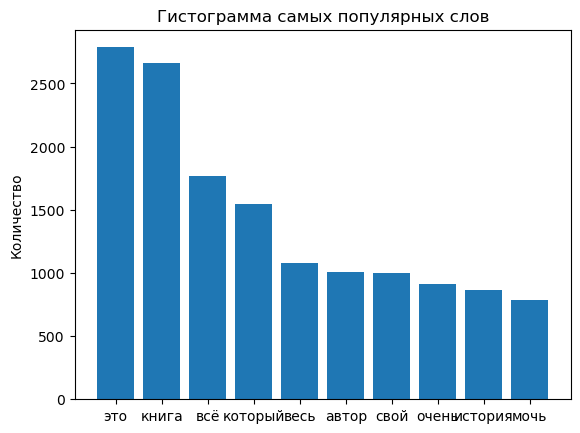

In [32]:
graph_build(most_popular_words(df, 3))